In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

df = pd.read_csv('CarPrice.csv')

In [3]:


print("Dataset Information:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

First few rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  

In [4]:


df['Car_Age'] = 2024 - df['Year']  
df = df.drop(columns=['Year', 'Car_Name'])  

In [5]:


df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [6]:

print("\nNull Values in the Dataset:")
print(df.isnull().sum())


Null Values in the Dataset:
Selling_Price              0
Present_Price              0
Driven_kms                 0
Owner                      0
Car_Age                    0
Fuel_Type_Diesel           0
Fuel_Type_Petrol           0
Selling_type_Individual    0
Transmission_Manual        0
dtype: int64


In [7]:

X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:

y_pred = rf_model.predict(X_test)
print("\nModel Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")


Model Performance:
Mean Squared Error: 0.93
R^2 Score: 0.96


In [10]:

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                   Feature  Importance
0            Present_Price    0.881166
3                  Car_Age    0.059495
1               Driven_kms    0.040265
7      Transmission_Manual    0.009646
4         Fuel_Type_Diesel    0.004339
5         Fuel_Type_Petrol    0.002564
6  Selling_type_Individual    0.002155
2                    Owner    0.000370


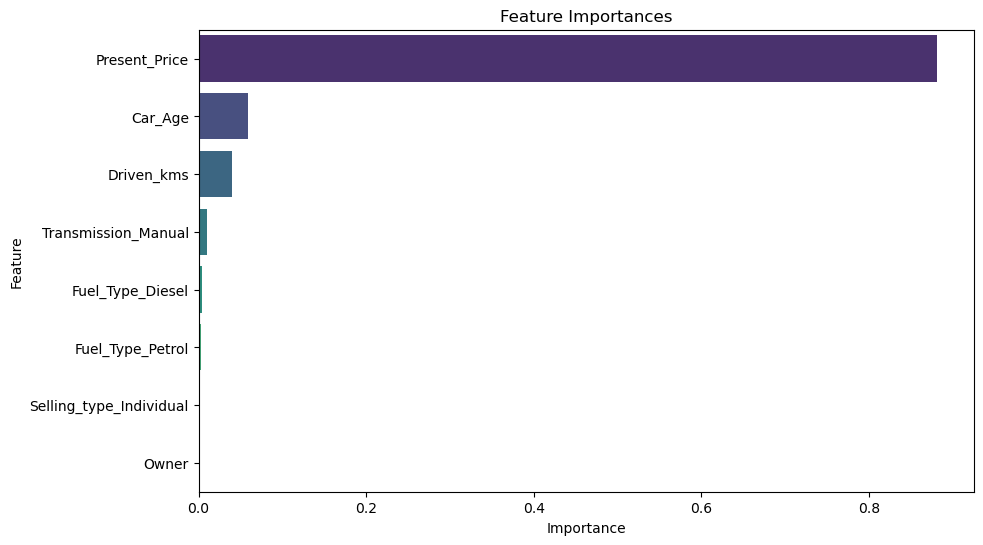

In [11]:

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances')
plt.show()

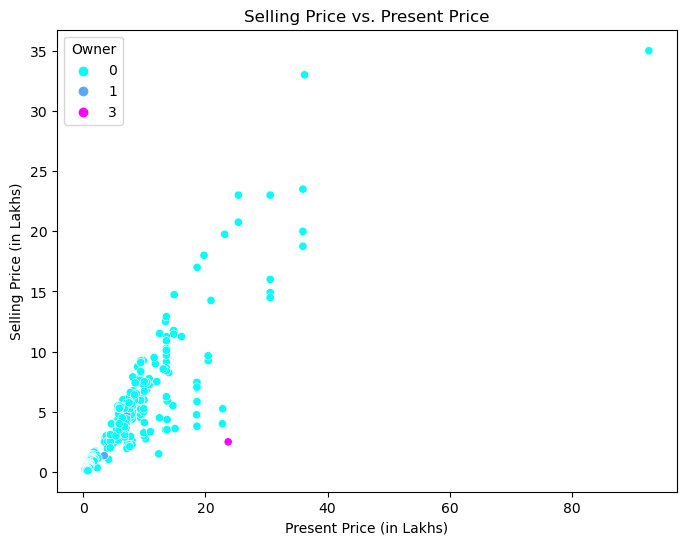

In [12]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'], hue=df['Owner'], palette='cool')
plt.title('Selling Price vs. Present Price')
plt.xlabel('Present Price (in Lakhs)')
plt.ylabel('Selling Price (in Lakhs)')
plt.show()


c:\Users\dipra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


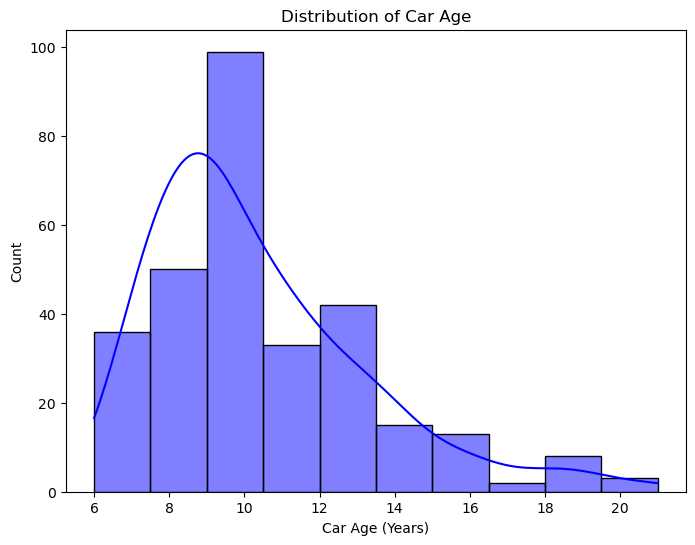

In [13]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Car_Age'], bins=10, kde=True, color='blue')
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Count')
plt.show()